Author: Prabin

## Introduction to Pandas
Pandas is a powerful and flexible open-source data analysis and manipulation library for the Python programming language. It provides data structures and functions needed to work with structured data seamlessly, particularly data tables similar to those found in relational databases or spreadsheets.

### Why Pandas?

Pandas was created to fill the need for a flexible and easy-to-use data manipulation tool that was missing in the Python ecosystem. Before Pandas, Python was less commonly used for data analysis compared to languages like R, which had more advanced data manipulation capabilities.

Key motivations for the development of Pandas include:

  * Handling Real-World Data: Most real-world data is messy and requires extensive cleaning and transformation. Pandas provides tools to handle missing data, filter rows, and columns, and merge datasets efficiently.

  * Ease of Use: Pandas offers a user-friendly interface that abstracts many of the complexities of data manipulation, making it accessible to both novice programmers and experienced data scientists.

  * Performance: Built on top of NumPy, Pandas leverages fast, efficient operations on large datasets, making it suitable for big data applications.

  * Integration with Other Tools: Pandas integrates well with other libraries in the Python ecosystem, such as Matplotlib for visualization and SciPy for scientific computing, providing a comprehensive environment for data analysis.

#### Installing and Importing Pandas:
1. Installation:

Pandas is part of the Anaconda distribution and can be installed as:
`conda install -c conda-forge pandas`

Pandas can be installed via package installer pip: `pip install pandas`

2. Importing into a file:

Pandas is imported into a working file using `import`, and more often than not, the alias `pd` is used.


In [131]:
# installing
!pip install pandas

In [132]:
# importing
import pandas as pd

## Handling Data with Pandas
When working with tabular data, such as data stored in spreadsheets or databases, pandas is the right tool for you. pandas will help you to explore, clean, and process your data. In pandas, a data table is called a DataFrame.

A Dataframe consists of rows and columns. Lets see what a dataframe looks like..


![alt text](https://docs.google.com/uc?export=download&id=1-WnqXG18kG9doRMVADQq8Lt9Xe5BTttk)

In the above image, you can see a table of data storing information about 4 cars. The 4 cars are kept in separate rows while the attributes (features) of the cars are kept in separate columns. The features may be:
1. Categorical:
  
  * Nominal: not ordered, mutually exculsive. eg: Car, House, Man
  * Ordinal: ordered, mutually exclusive. eg: low, medium, high

2. Numerical:

  * Discrete: Only particular numbers. eg: Counts
  * Continuous: Any numerical values. eg: Height in cm

In the above figure, the 'color' is categorical column having categorical values, while the 'number of doors' is a numerical column.

### Series vs DataFrame
DataFrame is made up of multiple series. Thus, a DataFrame can store more complex and heterogeneous data, while a Series can store more simple and homogeneous data.

In the above figure, if you look at one individual column, "Company," for example, this is a Series. There are four columns, which means that this table is made up of four pandas series put together. If you are wondering about the numbers 0, 1, 2, and 3 on the left, they are just indices, so we don't count them.

Alternatively, you can also look at each row as a Series. The first row where it says "Company," "Automatic shift," etc. is the equivalent of indices, we do not count them. They simply describe what the data means. If you look at it this way, there are four rows, so there are four pandas Series.

Let us create a pandas Series.

In [133]:
name_list = ['Ford', 'Ferrari', 'Lamborghini', 'Toyota']

# Create Series
names = pd.Series(name_list)

names

0           Ford
1        Ferrari
2    Lamborghini
3         Toyota
dtype: object

#### values and index properties of series:

 `series.values` Outputs the underlying array of data: ['Ford' 'Ferrari' 'Lamborghini' 'Toyota'].

 `series.index` Outputs the index object, which by default is a RangeIndex starting from 0, stopping at 4, with a step of 1. This indicates the positions of the elements in the Series.

In [134]:
print(names.values)
print(names.index)

['Ford' 'Ferrari' 'Lamborghini' 'Toyota']
RangeIndex(start=0, stop=4, step=1)


### Indexing in Series

The series object looks like a one-dimensional NumPy array. However, while the index in a NumPy array is implicitly defined, the series in Pandas have explicitly defined the index.

Due to this explicit definition, the series object is not limited only to the integer index, but we can also have strings as an index.

In [135]:
data = pd.Series([5, 10, 15, 20], index=['a', 'b', 'c', 'd'])
data

a     5
b    10
c    15
d    20
dtype: int64

### Accessing data from the series

In [136]:
# numerical indexing/slicing as numpy
print(data[0])
print(data[0:4])

5
a     5
b    10
c    15
d    20
dtype: int64


In [137]:
# accessomg data using the actual index
print(data['a'])

5


### DataFrame Creation
DataFrame has multiple columns, so lets create DataFrame. Before that lets create an empty dataframe where we can add the columns as needed.

In [138]:
#create empty dataframe
df = pd.DataFrame()

print(df)

Empty DataFrame
Columns: []
Index: []


In [139]:
name_list = ['Ford', 'Ferrari', 'Lamborghini', 'Toyota']

# Create DataFrame directly from list
df = pd.DataFrame(data = {'Company': name_list})

print(df)


       Company
0         Ford
1      Ferrari
2  Lamborghini
3       Toyota


Lets create a DataFrame with more columns.
We can directly use the list to create a dataframe or first create series from the lists and use the series to make a dataframe

In [140]:
name_list = ['Ford', 'Ferrari', 'Lamborghini', 'Toyota']
shift_list = [1,1,1,0]
color_list = ['red', 'blue', 'white', 'white']
door_list = [4,2,2,4]

# Create series first and later use them.
names = pd.Series(name_list)
shift = pd.Series(shift_list)
color = pd.Series(color_list)
door = pd.Series(door_list)

#create dataframe
df = pd.DataFrame()
df['Company'] = names
df['Automatic shift'] = shift
df['Color'] = color
df['Number of doors'] = door

#display dataframe
df

,Company,Automatic shift,Color,Number of doors
0,Ford,1,red,4
1,Ferrari,1,blue,2
2,Lamborghini,1,white,2
3,Toyota,0,white,4


Lets create dataframe directly from the lists

In [141]:
name_list = ['Ford', 'Ferrari', 'Lamborghini', 'Toyota']
shift_list = [1,1,1,0]
color_list = ['red', 'blue', 'white', 'white']
door_list = [4,2,2,4]

#create dataframe
df = pd.DataFrame(data={'Company':name_list,
                        'Automatic shift':shift_list,
                        'Color':color_list,
                        'Number of doors':door_list})

#display dataframe
df

,Company,Automatic shift,Color,Number of doors
0,Ford,1,red,4
1,Ferrari,1,blue,2
2,Lamborghini,1,white,2
3,Toyota,0,white,4


## Loading the dataset:
Often the dataset is already given in a tabular format (csv, xls, json, sql,etc) and we load the dataset instead of creating our own table manually. Lets load the dataset and perform some operations in the dataframe

In [144]:
dataset_path = 'Salaries.csv'
df = pd.read_csv(dataset_path)

In [145]:
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN


### Data visualization

In [146]:
df.shape

(148654, 13)

This means there are 49730 rows and 13 columns in the salaries.csv file.

Now lets see some rows for ourselves to check what they look like

In [147]:
df.head()   # first 5 rows

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [148]:
df.tail()    # last 5 rows

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148649,148650,Roy I Tillery,Custodian,0.0,0.0,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


####  df.info() provides concise summary of each columns such as non-null entries and data-types.
#### And df.describe() provides descriptive statistics of each columns (numerical columns!) such as mean, standard deviation, quartiles.

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [150]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


In [151]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

* Now, we will use **`df['column_name']`** approach to extract the data from specified columns.

In [152]:
df['Agency'], df['Year']

(0         San Francisco
 1         San Francisco
 2         San Francisco
 3         San Francisco
 4         San Francisco
               ...      
 148649    San Francisco
 148650    San Francisco
 148651    San Francisco
 148652    San Francisco
 148653    San Francisco
 Name: Agency, Length: 148654, dtype: object,
 0         2011
 1         2011
 2         2011
 3         2011
 4         2011
           ... 
 148649    2014
 148650    2014
 148651    2014
 148652    2014
 148653    2014
 Name: Year, Length: 148654, dtype: int64)

* Extracting the rows

In [153]:
df[0:5]    # first 5 rows. Index starts from 0. The last index is not included so the indices 0 to 4 are extracted.

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


#### `iloc` and `loc`
* loc: Accesses rows and columns by labels or boolean arrays. It is label-based indexing.
* iloc: Accesses rows and columns by integer positions. It is integer-based indexing.

In [154]:
# Sample DataFrame
data = {'one': [1, 2, 3], 'two': ['a', 'b', 'c']}
dfx = pd.DataFrame(data)
print(dfx,"\n")

# Set 'two' as the index in place
dfx.set_index('two', inplace=True)
print(dfx)

   one two
0    1   a
1    2   b
2    3   c 

     one
two     
a      1
b      2
c      3


`inplace = True` changes the original dataframe dfx.

In [155]:
dfx

,one
two,
a,1
b,2
c,3


In [156]:
dfx.loc['c']    # extract a single row (from other columns) that has 'c' in column 'two'

one    3
Name: c, dtype: int64

In [157]:
dfx.loc[['a','b']]    # extract multiple rows (from other columns) that have 'a' and 'b' in column two.

,one
two,
a,1
b,2


In [158]:
df    # recall that this dataframe is from the salary.csv

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN


In [159]:
# it is a good practice to index a particular column if we want to access rows based on that column. So lets index our column first
df_indexed = df.set_index('EmployeeName')
df_indexed

,Id,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
EmployeeName,,,,,,,,,,,,
NATHANIEL FORD,1,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
GARY JIMENEZ,2,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
ALBERT PARDINI,3,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
CHRISTOPHER CHONG,4,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
PATRICK GARDNER,5,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Roy I Tillery,148650,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
Not provided,148651,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
Not provided,148652,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN


In [160]:
df_indexed.loc['ALBERT PARDINI']

Id                                                3
JobTitle            CAPTAIN III (POLICE DEPARTMENT)
BasePay                                   212739.13
OvertimePay                               106088.18
OtherPay                                    16452.6
Benefits                                        NaN
TotalPay                                  335279.91
TotalPayBenefits                          335279.91
Year                                           2011
Notes                                           NaN
Agency                                San Francisco
Status                                          NaN
Name: ALBERT PARDINI, dtype: object

We don't need to index the column even though we might do it. Lets access rows and columns using loc, without indexing.

In [161]:
df.loc[2]                  # 3rd row, all column.
# 2 is not kept within '' commas because its the default index.

Id                                                3
EmployeeName                         ALBERT PARDINI
JobTitle            CAPTAIN III (POLICE DEPARTMENT)
BasePay                                   212739.13
OvertimePay                               106088.18
OtherPay                                    16452.6
Benefits                                        NaN
TotalPay                                  335279.91
TotalPayBenefits                          335279.91
Year                                           2011
Notes                                           NaN
Agency                                San Francisco
Status                                          NaN
Name: 2, dtype: object

In [162]:
df.loc[:,'EmployeeName']          # all rows and column 'EmployeeName'

0            NATHANIEL FORD
1              GARY JIMENEZ
2            ALBERT PARDINI
3         CHRISTOPHER CHONG
4           PATRICK GARDNER
                ...        
148649        Roy I Tillery
148650         Not provided
148651         Not provided
148652         Not provided
148653            Joe Lopez
Name: EmployeeName, Length: 148654, dtype: object

### Index based Selection - `iloc`
The `iloc` command for Pandas Dataframe stands for **integer-location(iloc)**. It selects the row and column based on the position.

```
df.iloc[<row selection>, <column selection>]
```
`iloc` in Pandas selects rows and columns by number, in the order that they appear in the data frame. You can imagine that each row has a row number from 0 to the total rows, and `iloc[]` allows selections based on these numbers. The same applies to columns.

In [163]:
df.iloc[2]   # third row, column selection left blank means select all column

Id                                                3
EmployeeName                         ALBERT PARDINI
JobTitle            CAPTAIN III (POLICE DEPARTMENT)
BasePay                                   212739.13
OvertimePay                               106088.18
OtherPay                                    16452.6
Benefits                                        NaN
TotalPay                                  335279.91
TotalPayBenefits                          335279.91
Year                                           2011
Notes                                           NaN
Agency                                San Francisco
Status                                          NaN
Name: 2, dtype: object

In [164]:
df.iloc[2,:]   # same as above, semicolon tells the pandas to select all columns (or rows when specified accordingly)

Id                                                3
EmployeeName                         ALBERT PARDINI
JobTitle            CAPTAIN III (POLICE DEPARTMENT)
BasePay                                   212739.13
OvertimePay                               106088.18
OtherPay                                    16452.6
Benefits                                        NaN
TotalPay                                  335279.91
TotalPayBenefits                          335279.91
Year                                           2011
Notes                                           NaN
Agency                                San Francisco
Status                                          NaN
Name: 2, dtype: object

In [165]:
df.iloc[2,1]       # third row, 2nd column

'ALBERT PARDINI'

In [166]:
df.iloc[[1,2]]     # 2nd and 3rd row, all column. notice the nested bracket for rows selection, column selection is left blank which means select all

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN


In [167]:
df.iloc[[1,2],:]      # same as above. semicolon means select all the columns (or rows if specified accordingly)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN


#### Boolean indices for the selection of rows:
df.loc can be used for boolean selection of rows by passing a boolean Series to filter the DataFrame. This is useful for selecting rows that meet specific conditions.

In [168]:
condition = df.loc[:,'Id'] < 3    # locate Id than compare with 3. Create a boolean series based on condition.
filtered_df = df.loc[condition]   # returns only the rows where the condition is true
print(filtered_df)

   Id    EmployeeName                                        JobTitle  \
0   1  NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2    GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   

     BasePay  OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.00  400184.25       NaN  567595.43         567595.43   
1  155966.02    245131.88  137811.38       NaN  538909.28         538909.28   

   Year  Notes         Agency  Status  
0  2011    NaN  San Francisco     NaN  
1  2011    NaN  San Francisco     NaN  


Now that we know the correct flow of the operation, Lets do one with shorter lines of code.

In [169]:
df.loc[df.loc[:,'Id'] == 2 ]   # runs inner df.loc first then uses the boolean condition to run the outer df.loc

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


Lets extract rows based on multiple boolean conditions

In [170]:
df.loc[(df.loc[:,"Id"] == 2) | (df.loc[:,"Id"] == 5)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


** Lets run the boolean condition and extract only 2 columns 'JobTitle' and 'Year' instead of all the columns.

In [171]:
df.loc[(df.loc[:,"Id"] == 2) | (df.loc[:,"Id"] == 5), ['JobTitle', 'Year']]

,JobTitle,Year
1,CAPTAIN III (POLICE DEPARTMENT),2011
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",2011


## Data Manipulation Operations:
These operations will handle the noisy data, thereby making the data more readable, by humans as well as by the model in the future stages

In [172]:
import numpy as np

A = ['a','b','c','d']
B = ['e',np.nan,'g','h']
C = ['i', 'j', np.nan, 'l']
D = ['a', 'e', 'i', 'o']
E = ['s', 'k', np.nan, 'g']

#create dataframe
df1 = pd.DataFrame(data=[A, B, C, D, E], columns=['one', 'two', 'three', 'four'])
df1

,one,two,three,four
0,a,b,c,d
1,e,NaN,g,h
2,i,j,NaN,l
3,a,e,i,o
4,s,k,NaN,g


1. Changing a single element from the dataframe.

Lets assume the value 'a' in the given dataframe is wrong, it can manually be corrected. For that we may want to change the element 'a' to 'z'. We do so by using the `loc` method

In [173]:
df1.loc[0,'one'] = 'z'
df1

,one,two,three,four
0,z,b,c,d
1,e,NaN,g,h
2,i,j,NaN,l
3,a,e,i,o
4,s,k,NaN,g


2. Fill missing values:

In the above dataframe df1, there are 3 missing values given as 'NaN'. We can fill them by using  `fillna` method.

In [174]:
# inplace = True indicates we make changes in the original dataframe
df1.fillna('2', inplace= True)
df1

,one,two,three,four
0,z,b,c,d
1,e,2,g,h
2,i,j,2,l
3,a,e,i,o
4,s,k,2,g


3. Drop rows or columns with missing values:

We need to specify the parameters axis: axis is 0 for dropping rows, 1 for dropping columns

In [175]:
A = ['a','b','c','d']
B = ['e',np.nan,'g','h']
C = ['i', 'j', np.nan, 'l']
D = ['a', 'e', 'i', 'o']
E = ['s', 'k', np.nan, 'g']

#create dataframe
df2 = pd.DataFrame(data=[A, B, C, D, E], columns=['one', 'two', 'three', 'four'])
df2

,one,two,three,four
0,a,b,c,d
1,e,NaN,g,h
2,i,j,NaN,l
3,a,e,i,o
4,s,k,NaN,g


In [176]:
df2.dropna()       # dropping the rows

,one,two,three,four
0,a,b,c,d
3,a,e,i,o


In [177]:
df2.dropna(axis = 1, inplace = False)     # dropping the columns
df2

,one,two,three,four
0,a,b,c,d
1,e,NaN,g,h
2,i,j,NaN,l
3,a,e,i,o
4,s,k,NaN,g


#### Apply function:

Apply in pandas can takes the following arguments:

  * func: The function to apply to each column/row.
  * axis: Axis along which the function is applied (0 for columns, 1 for rows).
  * raw: If True, passes raw ndarray to func instead of Series.
  * result_type: Determines how the results are arranged (e.g., 'expand', 'reduce', 'broadcast'). These only act on `axis = 1` (columns)
  * args: Positional arguments passed to func.
  * by_row: Compatibility alias for axis (deprecated).
  * engine: Execution engine to use ('python' or 'numba').
  * engine_kwargs: Additional arguments for the execution engine.
  * **kwargs: Additional keyword arguments passed to func.

In [178]:
dic = {'A':[1,2,3,4], 'B':[5,6,7,8]}
df3 = pd.DataFrame(dic)
df3

,A,B
0,1,5
1,2,6
2,3,7
3,4,8


In [179]:
df3.apply(sum, axis=0)

A    10
B    26
dtype: int64

In [180]:
df3.apply(sum, axis = 1)

0     6
1     8
2    10
3    12
dtype: int64

In [181]:
def cube(x):
  return x*(x**2)

In [182]:
df3.apply(cube)

,A,B
0,1,125
1,8,216
2,27,343
3,64,512


#### Filter()
Now let’s see another function called Pandas dataframe filter function. The filter function is used to Subset rows or columns of dataframe according to labels in the specified index. Note that the filter is applied to the labels of the index,this does not filter a dataframe on its contents.

In [183]:
# Creating the Series
sr = pd.Series({'Coca Cola': 45, 'Coke': 40, 'Fanta': 40, 'Dew': 50, 'Thumbs Up':30})
sr

Coca Cola    45
Coke         40
Fanta        40
Dew          50
Thumbs Up    30
dtype: int64

In [184]:
# filter values
sr.filter(regex = '^T.......p$')

Thumbs Up    30
dtype: int64

In [185]:
# filter values
sr.filter(regex = '. .')

Coca Cola    45
Thumbs Up    30
dtype: int64

# Groupby
There are certain situations where you need to find groups in columns of a dataframe. You might want to perform specific actions to specific groups.
For example, let's say you have a database of all the students at a university.
You want to group all the students by "current" or "alumni."

These kinds of features that separate the data into groups, or categories, are called categorical features. The command groupby is used predominantly for categorical grouping variables.


In [186]:
dic = {
    'Name': ['Bob','Sam','Mary','Alice','Beth'],
    'Status': ['Current','Alumni','Alumni','Alumni','Current'],
    'Fees': ['Due', 'Clear', 'Scholarship', 'Scholarship', 'Due'],
    'Score': [78,68,89,87,76],
    'Score2': [67,87,96,95,np.nan]
}

dff = pd.DataFrame(dic)
dff

,Name,Status,Fees,Score,Score2
0,Bob,Current,Due,78,67.0
1,Sam,Alumni,Clear,68,87.0
2,Mary,Alumni,Scholarship,89,96.0
3,Alice,Alumni,Scholarship,87,95.0
4,Beth,Current,Due,76,NaN


In [187]:
status = dff.groupby('Status')
status.groups

{'Alumni': [1, 2, 3], 'Current': [0, 4]}

In [188]:
fees = dff.groupby('Fees')
fees.groups

{'Clear': [1], 'Due': [0, 4], 'Scholarship': [2, 3]}

#### Internal operations in GroupBy (Split, apply, combine)

![](https://docs.google.com/uc?export=download&id=1N9e_ciPt26aL6IpGcjO8JeW213ZL8qAH)

Source Image: https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html



Lets perform some actions in groups now.

1. Counting

In [189]:
status.count()

,Name,Fees,Score,Score2
Status,,,,
Alumni,3,3,3,3
Current,2,2,2,1


In [190]:
fees.count()

,Name,Status,Score,Score2
Fees,,,,
Clear,1,1,1,1
Due,2,2,2,1
Scholarship,2,2,2,2


2. Sum

In [191]:
status.sum()

,Name,Fees,Score,Score2
Status,,,,
Alumni,SamMaryAlice,ClearScholarshipScholarship,244,278.0
Current,BobBeth,DueDue,154,67.0


3. Max:
group by maximum value

In [192]:
print(status["Score"].max())

Status
Alumni     89
Current    78
Name: Score, dtype: int64


3. Finding unique values

In some cases, we might want to find the number of unique values in a dataset. For example, you might want to know about the home countries of the students. This function only counts unique values, so even if a country is repeated, then it counts the country once.

In [193]:
status.nunique()

,Name,Fees,Score,Score2
Status,,,,
Alumni,3,2,3,3
Current,2,1,2,1


In [194]:
fees.nunique()

,Name,Status,Score,Score2
Fees,,,,
Clear,1,1,1,1
Due,2,1,2,1
Scholarship,2,1,2,2



#### Grouping more than one column

You might want to analyze two columns at once. You might be trying to find how many alumni still have their fees pending. You can do so using the following commands.

In [195]:
new_group = df.groupby(['Status', 'Fees'])
new_group.count()

KeyError: 'Fees'

### Aggregation:
Let us suppose you are analyzing data from a business. You might want to perform many statistical tests on the data. Let us apply different statistical measures on the data.

In [196]:
status.count()

,Name,Fees,Score,Score2
Status,,,,
Alumni,3,3,3,3
Current,2,2,2,1


In [197]:
# Perform aggregation
agg_df = dff.groupby('Status').agg({
    'Score': 'mean',
    'Score2': 'mean'
})

print(agg_df)

             Score     Score2
Status                       
Alumni   81.333333  92.666667
Current  77.000000  67.000000


Lets specify more aggregation functions.

Note that the funcions need to be specified within a list.

In [198]:
dff.groupby('Status').agg({'Score': ['mean','median','std', 'min', 'max']})

Score                          
              mean median        std min max
Status                                      
Alumni   81.333333   87.0  11.590226  68  89
Current  77.000000   77.0   1.414214  76  78

### Concatenation of DataFrames

In [199]:
# Creating data frames
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8,9,10,11])

In [200]:
print("\nThe DataFrame number 1\n",'_'*30, sep = '')
print(df1)
print("\nThe DataFrame number 2\n",'_'*30, sep = '')
print(df2)
print("\nThe DataFrame number 3\n",'_'*30)
print(df3)


The DataFrame number 1
______________________________
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

The DataFrame number 2
______________________________
    A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7

The DataFrame number 3
 ______________________________
      A    B    C    D
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11


In [201]:
df_cat1 = pd.concat([df1,df2,df3], axis=0)
print("\nAfter concatenation along row\n",'_'*30, sep='')
print(df_cat1)


After concatenation along row
______________________________
      A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11


In [202]:
df_cat2 = pd.concat([df1,df2,df3], axis=1)
print("\nAfter concatenation along column\n",'_'*60, sep='')
print(df_cat2)


After concatenation along column
____________________________________________________________
      A    B    C    D    A    B    C    D    A    B    C    D
0    A0   B0   C0   D0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1    A1   B1   C1   D1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2    A2   B2   C2   D2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3    A3   B3   C3   D3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4   NaN  NaN  NaN  NaN   A4   B4   C4   D4  NaN  NaN  NaN  NaN
5   NaN  NaN  NaN  NaN   A5   B5   C5   D5  NaN  NaN  NaN  NaN
6   NaN  NaN  NaN  NaN   A6   B6   C6   D6  NaN  NaN  NaN  NaN
7   NaN  NaN  NaN  NaN   A7   B7   C7   D7  NaN  NaN  NaN  NaN
8   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   A8   B8   C8   D8
9   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   A9   B9   C9   D9
10  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  A10  B10  C10  D10
11  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  A11  B11  C11  D11


Woah, there are a lot of missing values.

**Take a moment to think why there are so many missing values.**

* Answer: When concatenating along the columns, pandas align them according to their indices. This means the 2nd dataframe should begin from index 4 and the 3rd dataframe should begin from index 8. So the new dataframe moves downwards. Now since this is column-wise concatenation, the new dataframe moves rightwards. As a result of these, the concatenation seems to be happening diagonally, leading to any missing values where the indices do not match.

**Lets create the same dataframes but now without specifying the indices. Lets check if the column-wise concatenation happens as we intend to**

In [203]:
# Creating data frames
df4 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']})

df5 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']})

df6 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']})

In [204]:
df_cat22 = pd.concat([df4,df5,df6], axis=1)
print("\nAfter concatenation along column\n",'_'*60, sep='')
print(df_cat22)


After concatenation along column
____________________________________________________________
    A   B   C   D   A   B   C   D    A    B    C    D
0  A0  B0  C0  D0  A4  B4  C4  D4   A8   B8   C8   D8
1  A1  B1  C1  D1  A5  B5  C5  D5   A9   B9   C9   D9
2  A2  B2  C2  D2  A6  B6  C6  D6  A10  B10  C10  D10
3  A3  B3  C3  D3  A7  B7  C7  D7  A11  B11  C11  D11


As we can see, the concatenation happens as we intended, without specifying the indices exclusively.

### Merging 2 DataFrames by a common key:
Here the common key is the 'key' column having k0,k1,k2,k3 as common elements. Upon merging the 2 dataframe, the final dataframe should share the key column.

Properties:
* Combines DataFrames using columns or indexes.
* Similar to SQL joins (e.g., INNER, LEFT, RIGHT, OUTER).

In [205]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})

In [206]:
print("\nThe DataFrame 'left':\n")
print(left)
print("\nThe DataFrame 'right':\n")
print(right)


The DataFrame 'left':

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3

The DataFrame 'right':

  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3


In [208]:
merge1= pd.merge(left,right,how='inner',on='key')

In [209]:
merge1

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


### Join:
Joining is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single DataFrame based on 'index keys'.

Properties:
* Primarily combines DataFrames using their indexes.
* Simpler to use for index-based joins.

In [210]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2'])

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [211]:
print(left,"\n\n\n", right, sep = '')

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2


     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3


`left.join(right)` performs a left join. It includes all rows from left DataFrame and matching rows from right DataFrame. Unmatched rows from right are filled with NaN.

In [212]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


`left.join(right, 'outer')` performs outer join. It includes all rows from both left and right DataFrames. Rows without matches in either DataFrame are filled with NaN.

In [213]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


## Pivoting in Pandas:
A pivot operation in pandas is used to reshape data, summarizing it by transforming rows into columns. It's particularly useful for aggregating and viewing data in a more meaningful way.


During Pivoting:
* The elements of `columns` will be made the new columns.
* The elements of `values` will be the new values

In [217]:
# Sample DataFrame
data = {
    'Day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
    'Sale_Item': ['Apples', 'Bananas', 'Mango', 'Bananas', 'Apples', 'Bananas'],
    'Sales_Count': [10, 15, 20, 25, 30, 35]
}
dfs = pd.DataFrame(data)
print(dfs, "\n\n")
# Pivot table
pivot_df = dfs.pivot(index='Day', columns='Sale_Item', values='Sales_Count')
print(pivot_df)

         Day Sale_Item  Sales_Count
0     Sunday    Apples           10
1     Monday   Bananas           15
2    Tuesday     Mango           20
3  Wednesday   Bananas           25
4   Thursday    Apples           30
5     Friday   Bananas           35 


Sale_Item  Apples  Bananas  Mango
Day                              
Friday        NaN     35.0    NaN
Monday        NaN     15.0    NaN
Sunday       10.0      NaN    NaN
Thursday     30.0      NaN    NaN
Tuesday       NaN      NaN   20.0
Wednesday     NaN     25.0    NaN


## Built-in Visualization in Pandas

In [222]:
import matplotlib.pyplot as plt
%matplotlib inline
# configures the notebook to display Matplotlib plots directly inline within the notebook itself, as static images

In [224]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [226]:
df['TotalPay']

0         567595.43
1         538909.28
2         335279.91
3         332343.61
4         326373.19
            ...    
148649         0.00
148650         0.00
148651         0.00
148652         0.00
148653      -618.13
Name: TotalPay, Length: 148654, dtype: float64

1. Histogram:

 A histogram is a graphical representation of the distribution of numerical data. It consists of bars that show the frequency or count of data points within certain ranges (bins) of values.

Lets draw a histogram to visualize the totalpay of the employees.

<Axes: >

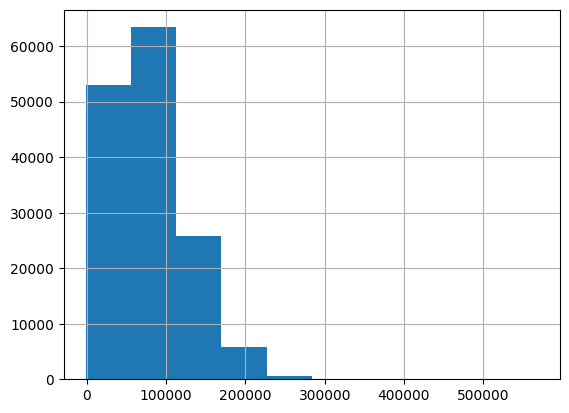

In [227]:
df['TotalPay'].hist()

Lets use histogram to visualize the `JobTitle` of the first 5 instances.

Within the first 5 instances, there are 2 job titles called `Captain III (Police Department)`, lets see in histogram if the count is 2 for that job title and 1 for other

<Axes: >

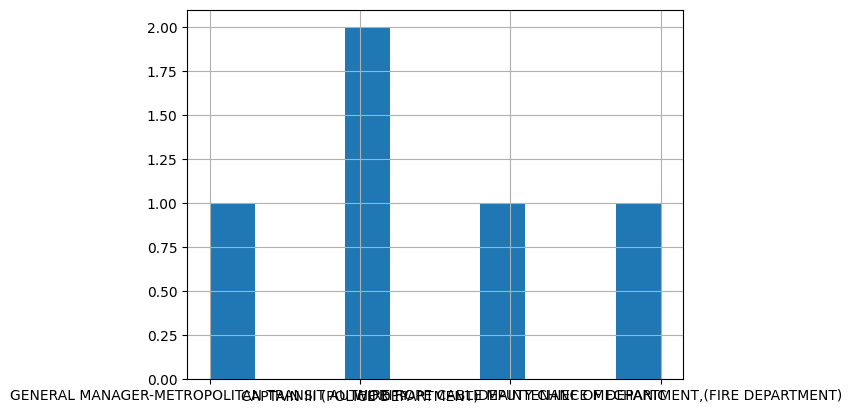

In [230]:
df['JobTitle'].head().hist()

These were the histogram plots for a single column.

Lets visualize the histogram plots for multiple columns by binning.

array([[<Axes: title={'center': 'TotalPay'}>,
        <Axes: title={'center': 'TotalPayBenefits'}>]], dtype=object)

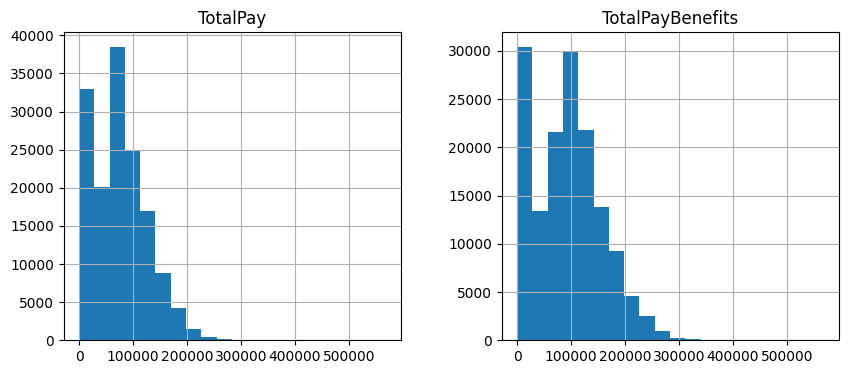

In [233]:
df.hist(column=['TotalPay','TotalPayBenefits'],bins=20,figsize=(10,4))

Lets create a generic histogram for all columns

<Axes: ylabel='Frequency'>

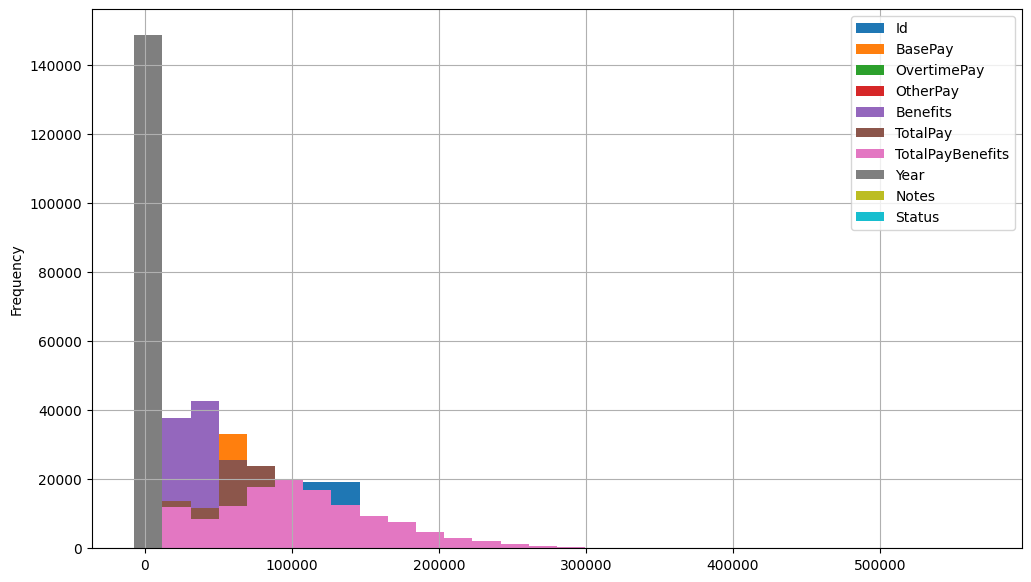

In [234]:
df.plot(kind='hist', bins=30, grid=True, figsize=(12,7))

Lets drop the column 'Year' and 'OtherPay' to better be able to visualize the distribution of data in other columns.

<Axes: ylabel='Frequency'>

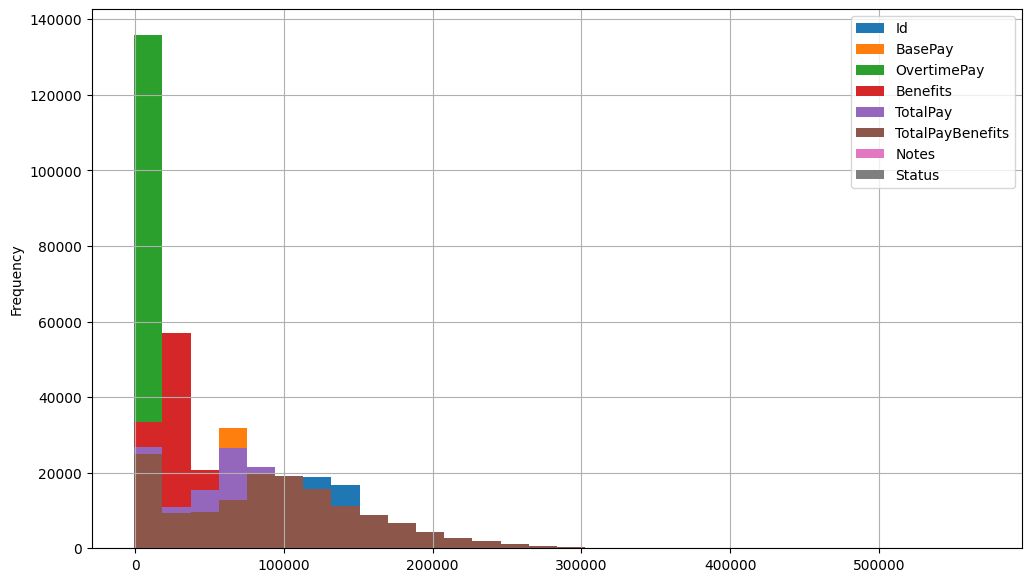

In [236]:
df.drop(columns=['Year', 'OtherPay']).plot(kind='hist', bins=30, grid=True, figsize=(12,7))

2. Scatterplots:

A scatterplot is a graph that displays the relationship between two numerical variables. Each data point is represented by a dot, with the x-axis showing one variable and the y-axis showing the other. Scatterplots are useful for identifying patterns, trends, and relationships between variables.


In [237]:
import seaborn as sns

<Axes: xlabel='TotalPay', ylabel='OvertimePay'>

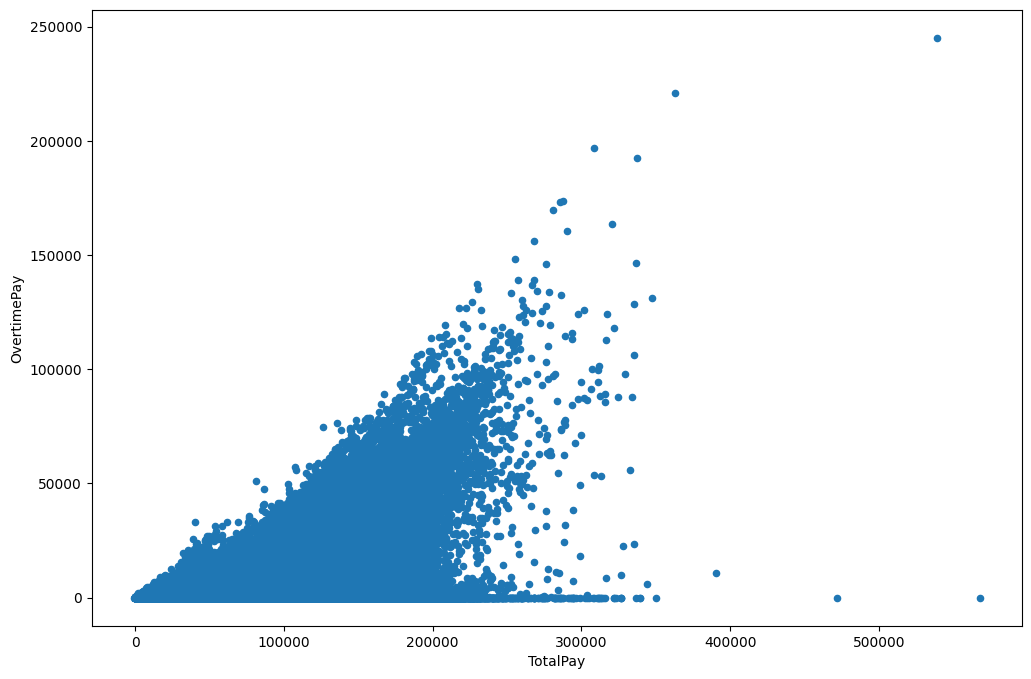

In [241]:
df.plot.scatter(x='TotalPay',y='OvertimePay',figsize=(12,8))

<Axes: xlabel='BasePay', ylabel='TotalPay'>

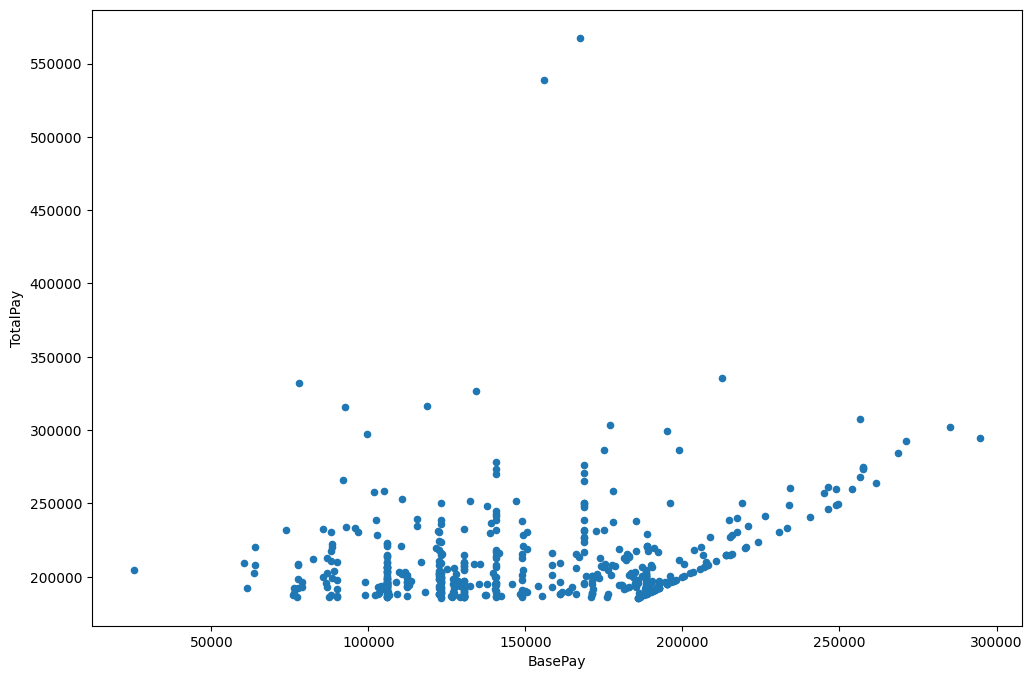

In [249]:
df.head(500).plot.scatter(x='BasePay',y='TotalPay',figsize=(12,8))             #for first 500 instances only

3. Boxplot:

A boxplot (or box-and-whisker plot) provides a visual summary of the distribution of numerical data through quartiles. It displays the median, quartiles, and potential outliers of the data set. The box represents the interquartile range (IQR), with a line inside marking the median. The whiskers extend to show the range of the data, excluding outliers.

<Axes: >

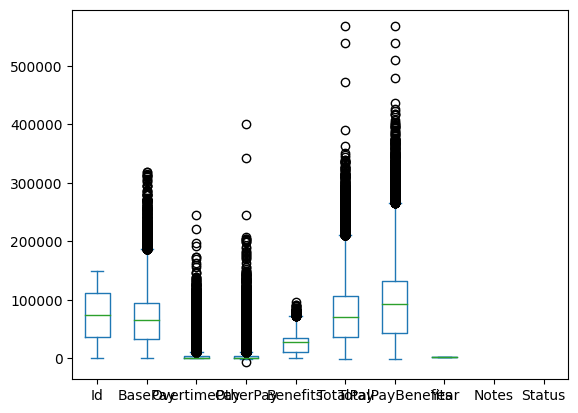

In [252]:
|df.plot.box()

<Axes: >

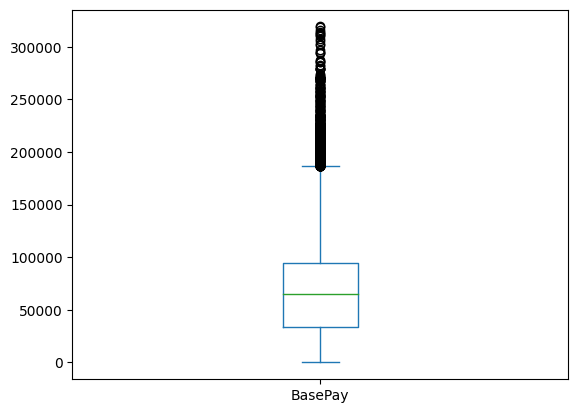

In [261]:
df['BasePay'].plot.box()

4. Kernal Density Estimation:

A kernel density estimation plot is used to estimate the probability density function of a continuous random variable. It provides a smoothed, continuous representation of the distribution of data points. KDE plots are useful for visualizing the shape of the data distribution and are often used in conjunction with histograms or boxplots for deeper insight into data patterns.

<Axes: ylabel='Density'>

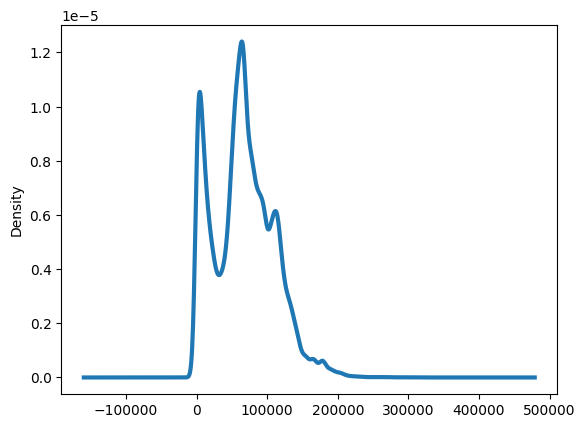

In [264]:
df['BasePay'].plot.density(lw=3)    # lw = line width

<Axes: ylabel='Density'>

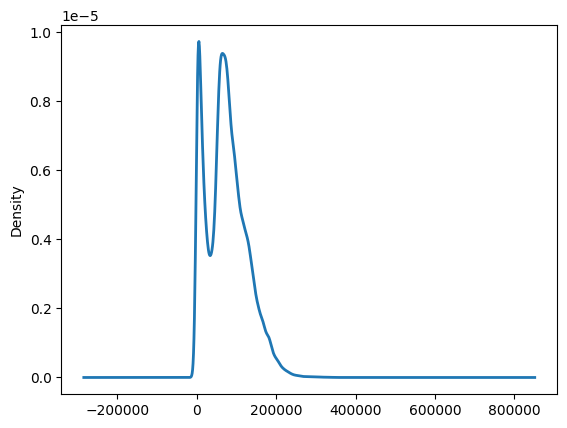

In [265]:
df['TotalPay'].plot.density(lw=2)